<a href="https://colab.research.google.com/github/Aleksandar1932/ML_2021/blob/master/Laboratory%20Exercises/Laboratory%20Exercise%201/Laboratory_Exercise_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="grey">Libraries and utility functions</font>

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [89]:
def get_metrics(y_true, y_pred, model_name):
    return [model_name, accuracy_score(y_true, y_pred), f1_score(y_true, y_pred),precision_score(y_true, y_pred), recall_score(y_true, y_pred)]

# Load data


In [26]:
df = pd.read_csv('/content/Pokemon.csv')

In [27]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Data pre-processing

## Structure Exploration

In [28]:
df.shape

(800, 13)

In [29]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [30]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [31]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Ghost       14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

The `Name` feature is not necessary and we are going to drop it. The feature `#` also is going to be dropped because `pandas` provides indexing. Also the features `Type 1` and `Type 2` are categorical features so we are going to encode them and use for classification.

## Dropping unnecessary features

In [32]:
df.drop(['Name'], axis=1, inplace=True)

In [33]:
df.drop(['#'], axis=1, inplace=True)

In [34]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False


## Missing values detection

Before we apply any ML models, we need to examine wether there are missing values in the data.

In [35]:
df.isna().any()

Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

There are missing values in our dataset, the strategy which we are going to use is one of the simplest, i.e. Mode Imputation (because the missing data are categorical). The drawbacks are not going to be discussed any further, but in general case more sophisticated approach should be considered, such as building probabalistic models to handle the missing data.

In [36]:
df.fillna(df.mode().iloc[0], inplace=True)

In [37]:
df.isna().any().any()

False

<font color="red">**Conclusion**:</font> There are not features with missing values in the dataset.

## Encoding categorical features

In order to perform the supervised learning algorithms discussed in the course Machine Learning, we need to encode the features. For this purpouse `sklearn.preprocessing.LabelEncoder` is going to be leveraged.

In [38]:
le = LabelEncoder()
df['Type 1'] = le.fit_transform(df['Type 1'])

In [39]:
le = LabelEncoder()
df['Type 2'] = le.fit_transform(df['Type 2'])

In [40]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,False
1,9,13,405,60,62,63,80,80,60,1,False
2,9,13,525,80,82,83,100,100,80,1,False
3,9,13,625,80,100,123,122,120,80,1,False
4,6,7,309,39,52,43,60,50,65,1,False


<font color="red">**Conclusion**:</font> All of the data are numerical and can be represented within vector spaces.

# Exploratory Data Analysis (EDA)

## Distribution of the features

In [52]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("dark")

<Figure size 432x288 with 0 Axes>

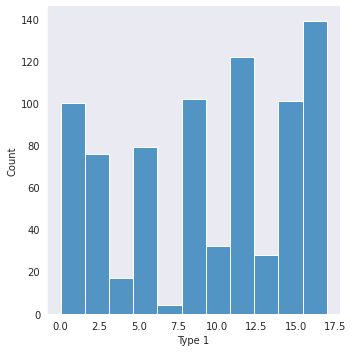

<Figure size 432x288 with 0 Axes>

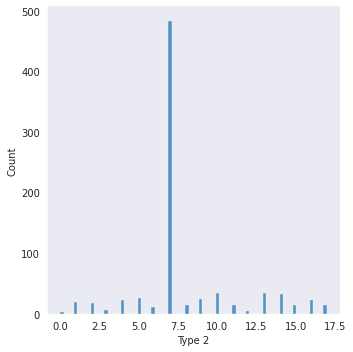

<Figure size 432x288 with 0 Axes>

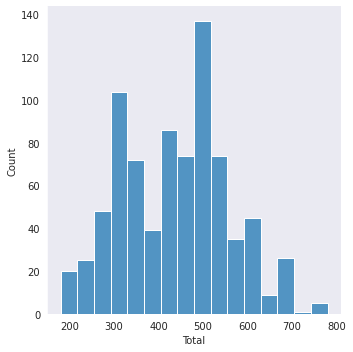

<Figure size 432x288 with 0 Axes>

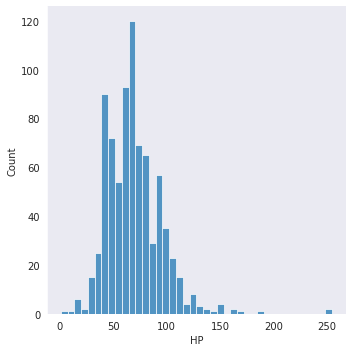

<Figure size 432x288 with 0 Axes>

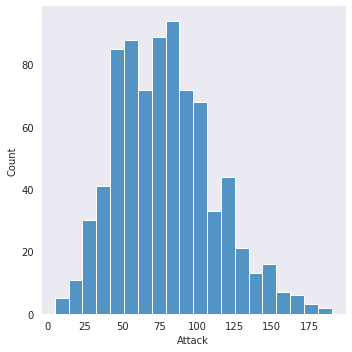

<Figure size 432x288 with 0 Axes>

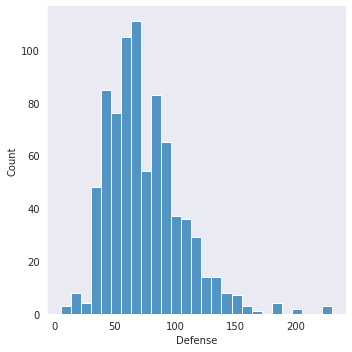

<Figure size 432x288 with 0 Axes>

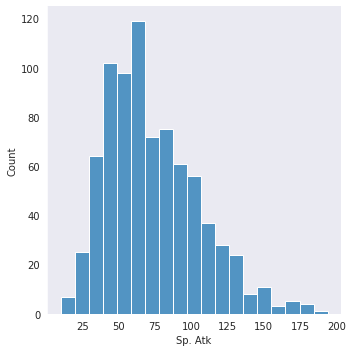

<Figure size 432x288 with 0 Axes>

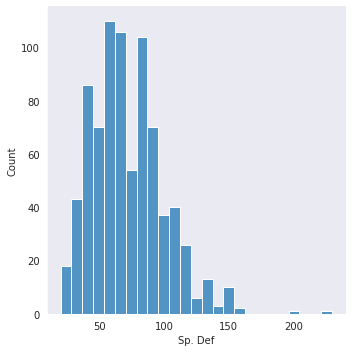

<Figure size 432x288 with 0 Axes>

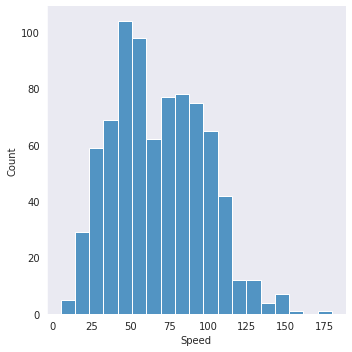

<Figure size 432x288 with 0 Axes>

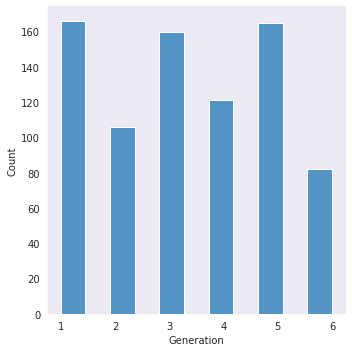

<Figure size 432x288 with 0 Axes>

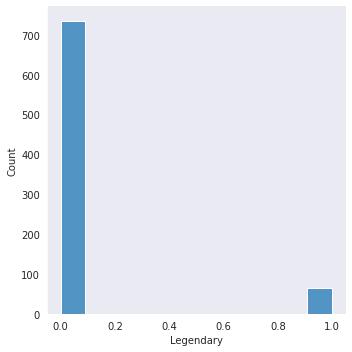

In [53]:
for column in df.columns:
    plt.figure() 
    sns.displot(df[column])

## Pair-plots

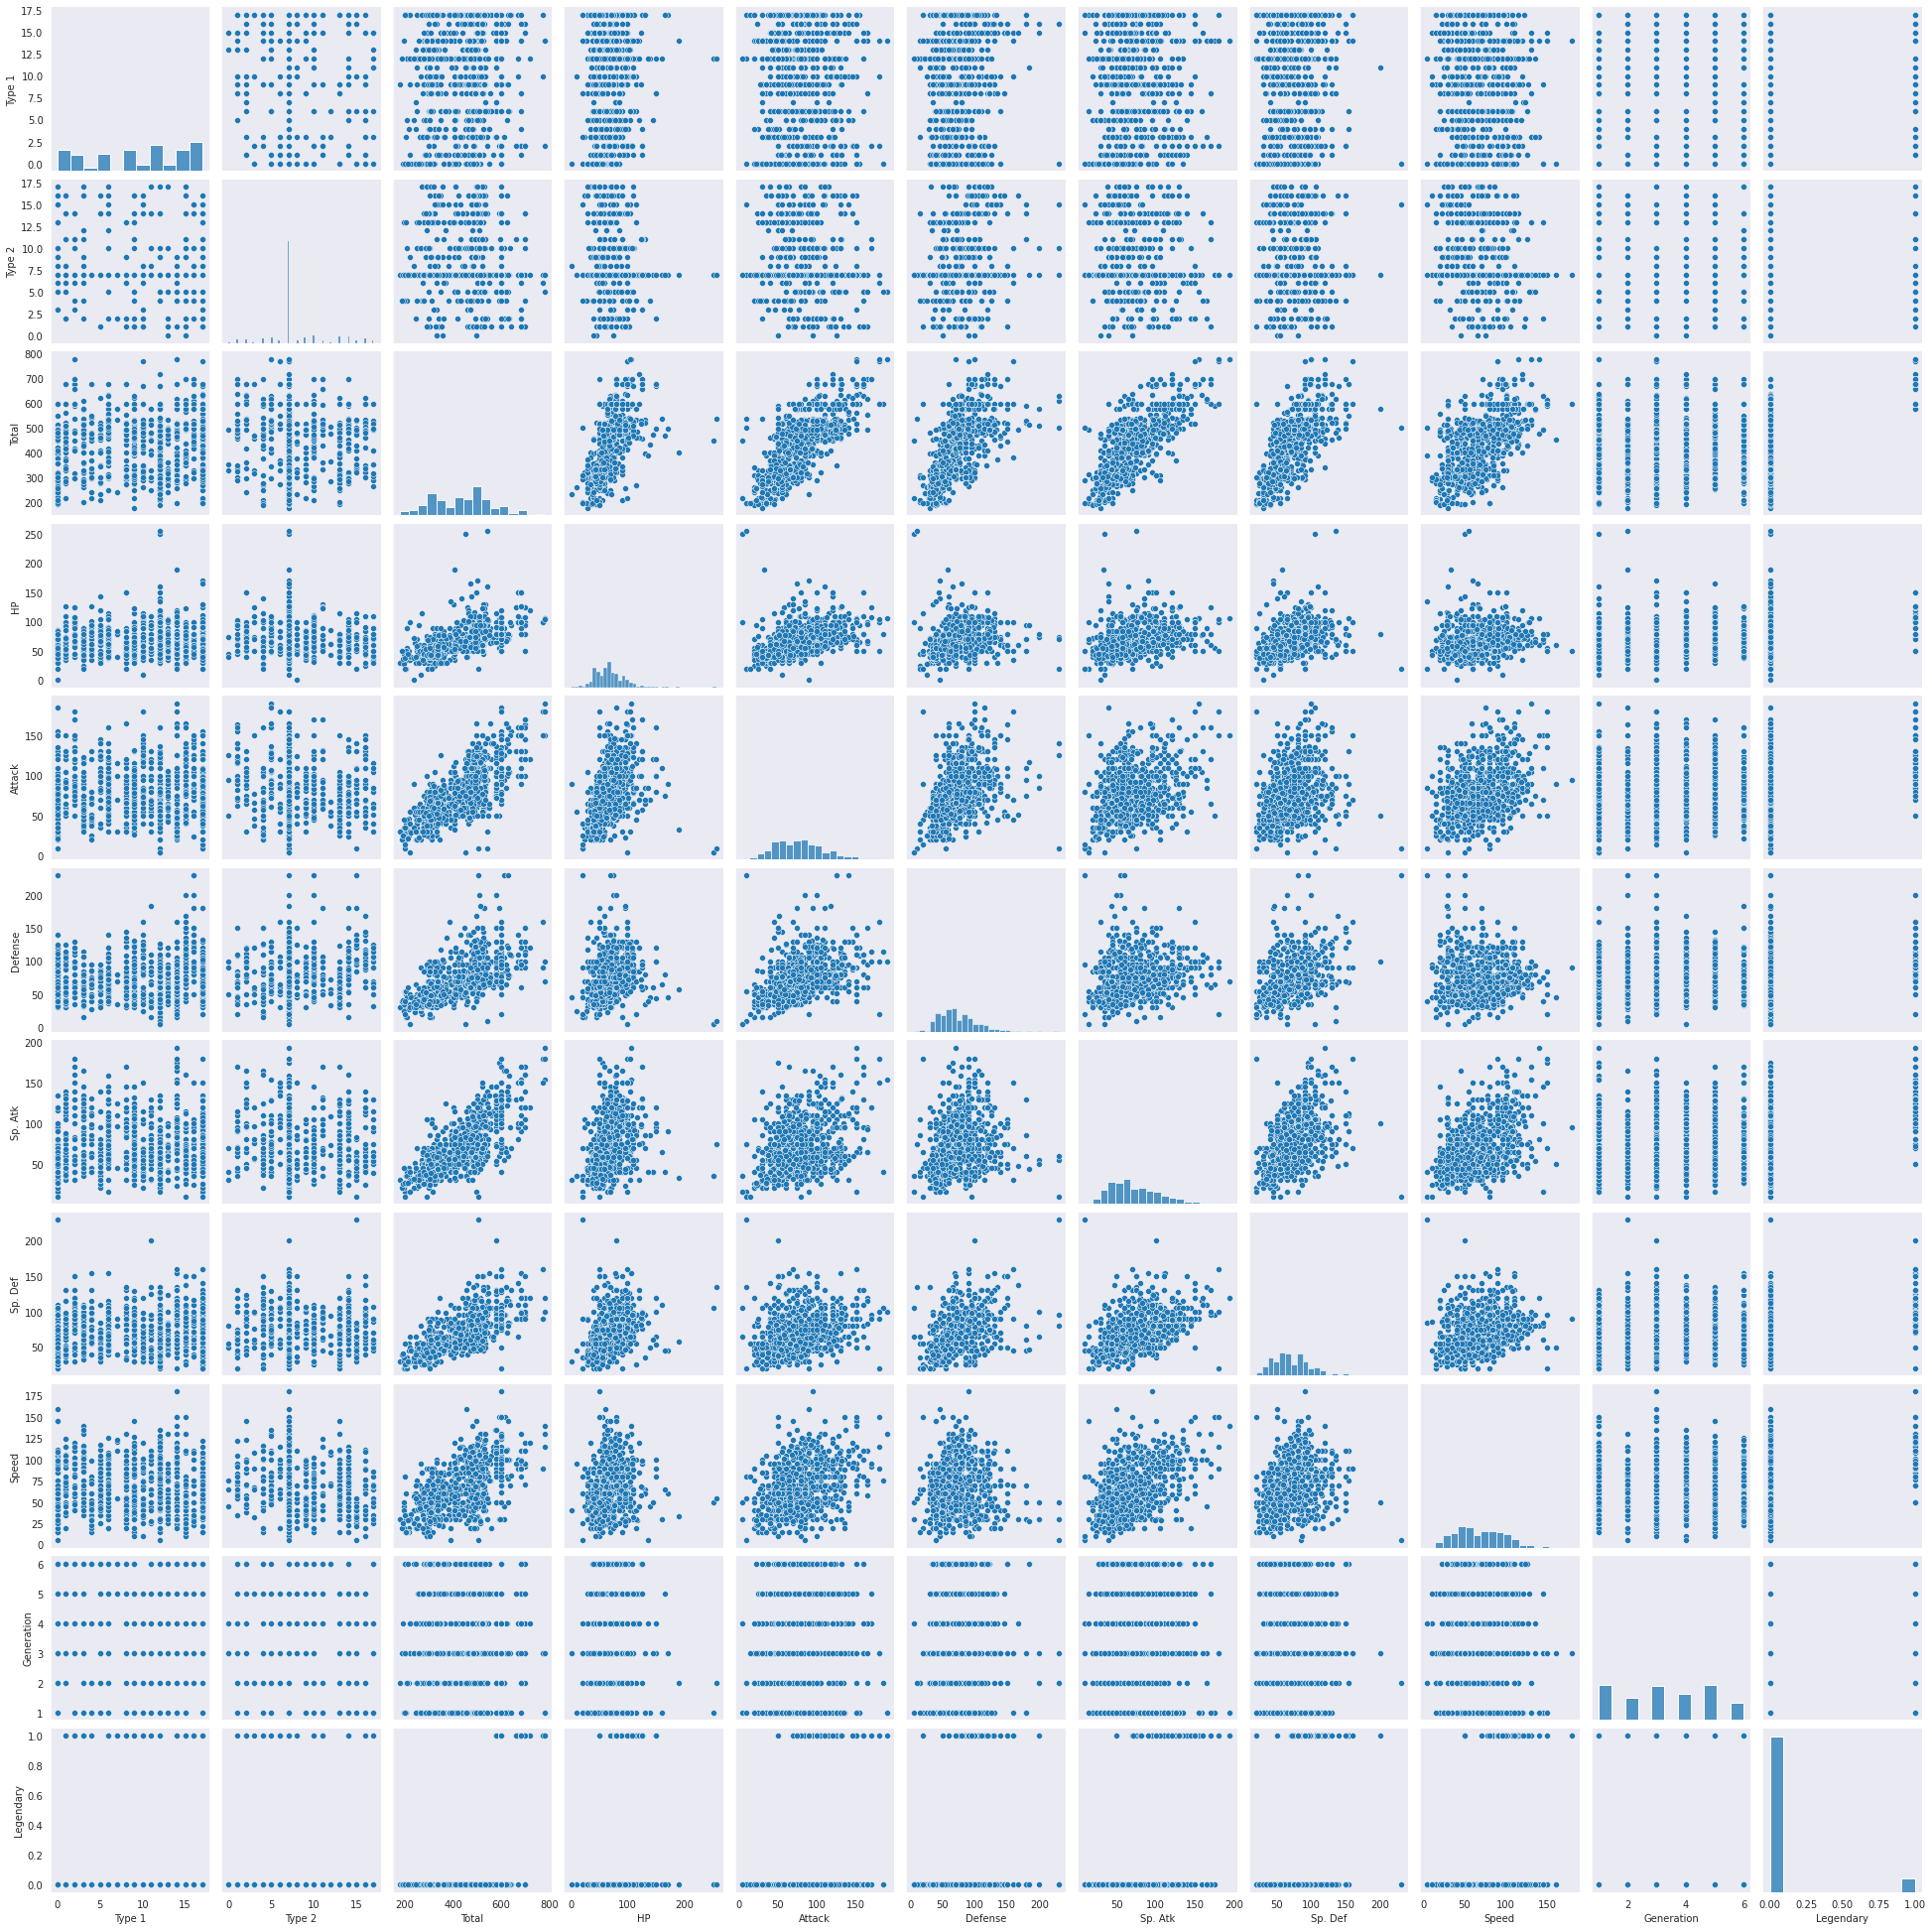

In [54]:
sns.pairplot(df)

## Between feature dependance

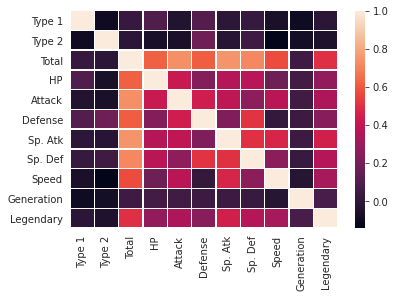

In [59]:
ax = sns.heatmap(df.corr(), linewidths=.5)

## Visualization with reduced dimensionality

PCA approach for dimensionality reduction is going to be performed before the data are visualized in 3D space.

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_reduced_df = pd.DataFrame(pca.fit_transform(df.drop(columns=["Generation", "Legendary"])))

pca_reduced_df.insert(3, "Generation", df["Generation"].to_list(), True)
pca_reduced_df.insert(4, "Legendary", df["Legendary"].astype(int).to_list(), True)

In [66]:
import plotly.express as px

In [76]:
fig = px.scatter_3d(pca_reduced_df, x=0, y=1,z=2, color="Legendary", labels={
                     "0": "PC 1",
                     "1": "PC 2",
                     "2": "PC 3"
                 }, size="Generation")
fig.show()

From the visualization we can clearly see a border for `Legendary` between `100` and `200` on PC1-axis and parallel to PC3-axis, but there is some overlapping which can be due to noise, PCA or due to the not-linearity of the problem.

In [78]:
fig = px.scatter_3d(pca_reduced_df, x=0, y=1,z=2, color="Generation", labels={
                     "0": "PC 1",
                     "1": "PC 2",
                     "2": "PC 3"
                 })
fig.show()

Clear border between the classes of Generation can not be seen in this visualization, the cause can be the data or just PCA not capturing enough information.

# Classification for `Legendary`

Before we apply any ML models we need to split the data into `X` and `y` and training and test data. We are going to use `sklearn.model_selection train_test_split` to provide bootstrap-based samping. We are going to use 20% of the dataset for testing and 80% for training the models.

In [81]:
X = df.drop(columns=["Legendary"])

In [82]:
y = df["Legendary"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [102]:
metrics_legendary = []

## Naïve Bayes

### Model Training

In [109]:
from sklearn.naive_bayes import CategoricalNB
nb_clf_legendary = CategoricalNB(alpha=1)
nb_clf_legendary.fit(X_train, y_train)

CategoricalNB(alpha=1, class_prior=None, fit_prior=True)

### Model Evaluation

In [110]:
y_pred_nb_legendary = nb_clf.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred_nb_legendary))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       144
        True       0.62      0.50      0.55        16

    accuracy                           0.92       160
   macro avg       0.78      0.73      0.75       160
weighted avg       0.91      0.92      0.91       160



In [116]:
print(confusion_matrix(y_test, y_pred_nb_legendary))

[[139   5]
 [  8   8]]


In [120]:
metrics_legendary.append(get_metrics(y_test, y_pred_nb_legendary, "Naïve Bayes"))

## Linear Discriminant Analysis (LDA)

### Model Training

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf_legendary = LinearDiscriminantAnalysis()
lda_clf_legendary.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Model Evaluation

In [123]:
y_pred_lda_legendary = lda_clf_legendary.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred_lda_legendary))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95       144
        True       0.56      0.31      0.40        16

    accuracy                           0.91       160
   macro avg       0.74      0.64      0.67       160
weighted avg       0.89      0.91      0.89       160



In [125]:
print(confusion_matrix(y_test, y_pred_lda_legendary))

[[140   4]
 [ 11   5]]


In [126]:
metrics_legendary.append(get_metrics(y_test, y_pred_lda_legendary, "LDA"))

## Quadratic Discriminant Analysis (QDA)

### Model Training

In [128]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf_legendary = QuadraticDiscriminantAnalysis()
qda_clf_legendary.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

### Model Evaluation

In [130]:
y_pred_qda_legendary = qda_clf_legendary.predict(X_test)

In [131]:
print(classification_report(y_test, y_pred_qda_legendary))

              precision    recall  f1-score   support

       False       0.97      0.87      0.92       144
        True       0.39      0.75      0.51        16

    accuracy                           0.86       160
   macro avg       0.68      0.81      0.71       160
weighted avg       0.91      0.86      0.88       160



In [132]:
print(confusion_matrix(y_test, y_pred_qda_legendary))

[[125  19]
 [  4  12]]


In [133]:
metrics_legendary.append(get_metrics(y_test, y_pred_qda_legendary, "QDA"))

## Models summary and conclusion

In [134]:
models_summary_legendary = pd.DataFrame(metrics_legendary, columns = ["Model", "Accuracy", "f1", "Precision", "Recall"])
models_summary_legendary = models_summary_legendary.style.highlight_max(color = 'red', axis = 0)
models_summary_legendary

,Model,Accuracy,f1,Precision,Recall
0,Naïve Bayes,0.918750,0.551724,0.615385,0.500000
1,LDA,0.906250,0.400000,0.555556,0.312500
2,QDA,0.856250,0.510638,0.387097,0.750000


NB provides the best accuracy, f1 and precission, then QDA performs better overall and LDA has slightly lower scores than QDA. As a conclusion the features conditional independance assumption in NB provides the best results in this setting.

# Classification for `Generation`

Before we apply any ML models we need to split the data into `X` and `y` and training and test data. We are going to use `sklearn.model_selection train_test_split` to provide bootstrap-based samping. We are going to use 20% of the dataset for testing and 80% for training the models.

In [143]:
X = df.drop(columns=["Generation"])

In [144]:
y = df["Generation"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [146]:
metrics_generation = []

## Naïve Bayes

### Model Training

In [147]:
from sklearn.naive_bayes import CategoricalNB
nb_clf_generation = CategoricalNB(alpha=1)
nb_clf_generation.fit(X_train, y_train)

CategoricalNB(alpha=1, class_prior=None, fit_prior=True)

### Model Evaluation

In [148]:
y_pred_nb_generation = nb_clf.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred_nb_generation))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.19      0.11      0.14        28
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        23

    accuracy                           0.02       160
   macro avg       0.03      0.02      0.02       160
weighted avg       0.03      0.02      0.02       160



In [150]:
print(confusion_matrix(y_test, y_pred_nb_generation))

[[ 0  0  0  0  0  0  0]
 [25  3  0  0  0  0  0]
 [15  1  0  0  0  0  0]
 [29  3  0  0  0  0  0]
 [28  2  0  0  0  0  0]
 [27  4  0  0  0  0  0]
 [20  3  0  0  0  0  0]]


## Linear Discriminant Analysis (LDA)

### Model Training

In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf_generation = LinearDiscriminantAnalysis()
lda_clf_generation.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Model Evaluation

In [153]:
y_pred_lda_generation = lda_clf_generation.predict(X_test)

In [154]:
print(classification_report(y_test, y_pred_lda_generation))

              precision    recall  f1-score   support

           1       0.19      0.39      0.25        28
           2       0.50      0.31      0.38        16
           3       0.23      0.22      0.23        32
           4       0.00      0.00      0.00        30
           5       0.19      0.35      0.24        31
           6       0.00      0.00      0.00        23

    accuracy                           0.21       160
   macro avg       0.18      0.21      0.18       160
weighted avg       0.17      0.21      0.18       160



In [155]:
print(confusion_matrix(y_test, y_pred_lda_generation))

[[11  1  6  0 10  0]
 [ 7  5  2  0  2  0]
 [10  1  7  0 14  0]
 [12  0  3  0 14  1]
 [ 8  2  9  0 11  1]
 [11  1  3  0  8  0]]


## Quadratic Discriminant Analysis (QDA)

### Model Training

In [157]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf_generation = QuadraticDiscriminantAnalysis()
qda_clf_generation.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

### Model Evaluation

In [158]:
y_pred_qda_generation = qda_clf_generation.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred_qda_generation))

              precision    recall  f1-score   support

           1       0.22      0.39      0.29        28
           2       0.18      0.12      0.15        16
           3       0.29      0.53      0.37        32
           4       0.31      0.13      0.19        30
           5       0.40      0.26      0.31        31
           6       0.12      0.04      0.06        23

    accuracy                           0.27       160
   macro avg       0.25      0.25      0.23       160
weighted avg       0.27      0.27      0.24       160



In [160]:
print(confusion_matrix(y_test, y_pred_qda_generation))

[[11  4  5  2  3  3]
 [ 4  2  4  0  4  2]
 [ 7  3 17  3  1  1]
 [ 9  1 13  4  2  1]
 [10  0 10  3  8  0]
 [ 8  1 10  1  2  1]]


## Conclusion

Due to the unseparability of the classes, all of the models perform poorly, i.e. NB has accuracy of `0.02`, LDA has `0.21` and QDA dominates with `0.27`. As conclusion, another models should be considered to model the unseperability and the overall problem structure.